# Shuffling simulations

Simulations for a talk on shuffling.

* Introduction
* Is there information in the deck after shuffling?
  * How much information sticks around and for how long?
  * How can I use it to surprise, astonish, entertain?
  * How could it be used to cheat or prevent cheating at card games?
  * How much shuffling is needed for a deck to be _really_ shuffled?

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
# Read all the data.
riffle_data = pd.read_csv('riffle.csv')
riffle_pos_data = pd.read_csv('riffle_pos.csv')
overhand_data = pd.read_csv('overhand.csv')
avg_riffle_data = pd.read_csv('avg_riffle.csv')
avg_overhand_data = pd.read_csv('avg_overhand.csv')
riffle_over_data = pd.read_csv('riffle_over.csv')
avg_riffle_over_data = pd.read_csv('avg_riffle_over.csv')
avg_ifaro_data = pd.read_csv('avg_ifaro.csv')
out_faro_data = pd.read_csv('out_faro.csv')
in_faro_data = pd.read_csv('in_faro.csv')


In [3]:
display(riffle_data.head())

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,entropy
0,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,0.000000
1,25,0,26,1,27,2,28,3,29,4,...,20,48,21,49,22,50,23,51,24,1.481451
2,25,39,0,13,26,40,1,14,27,2,...,36,50,37,23,11,51,38,24,12,1.657289
3,25,39,0,13,46,26,7,40,19,1,...,31,51,45,38,6,24,18,12,32,2.130178
4,25,35,39,29,0,49,13,43,46,10,...,6,9,24,18,3,12,21,32,42,2.687542


In [4]:
display(riffle_data.shape)

(20, 53)

In [5]:
def entropy_graph(df, x_label):
    fig, ax = plt.subplots()
    sns.lineplot(x='index', y='entropy', marker='o', data=df.reset_index())
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(xlabel=x_label, ylabel='Shannon Entropy')

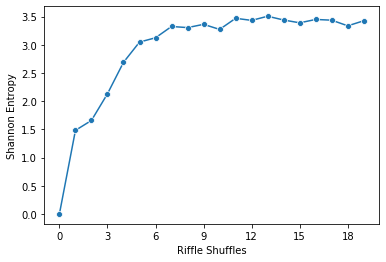

In [6]:
entropy_graph(riffle_data, 'Riffle Shuffles')

In [7]:
def sequence_graph(df, x_label):
    t = df
    g = sns.FacetGrid(df, col_wrap=4, col='shuffle')
    g.map(plt.scatter, 'orig_index', 'new_index', alpha=.7)
    g.add_legend();

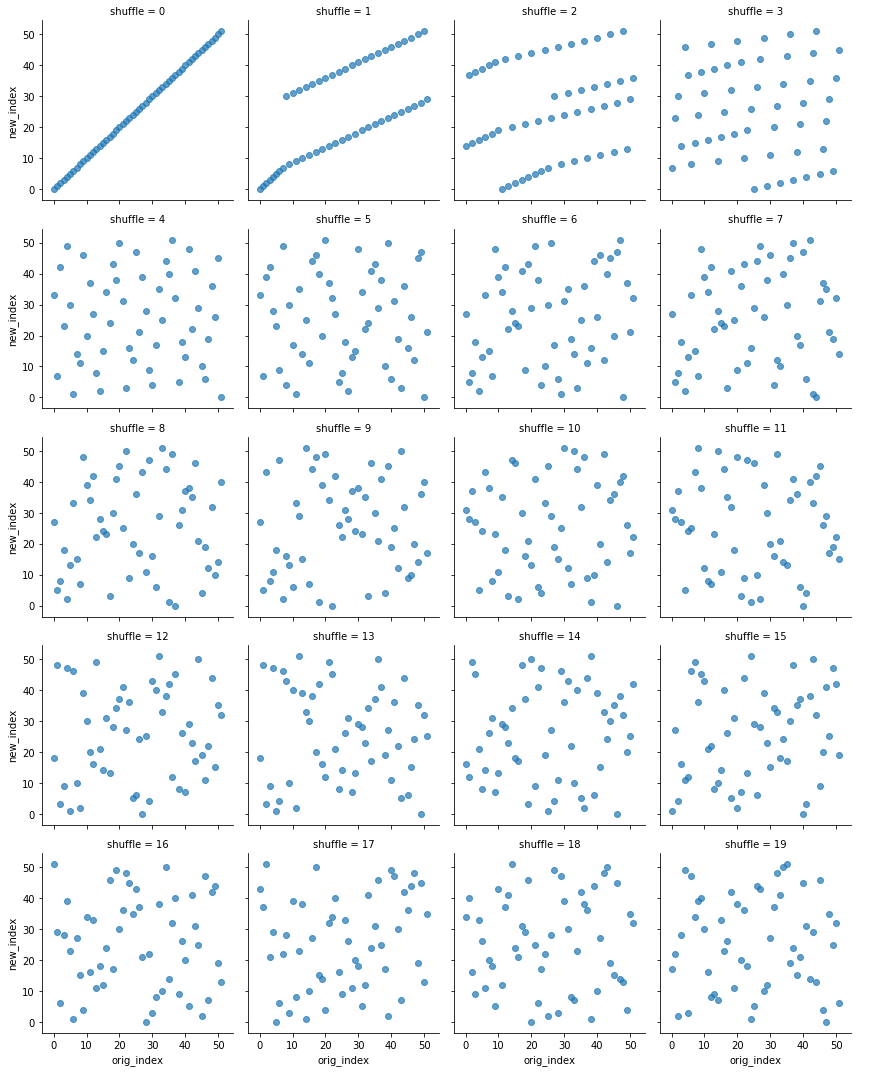

In [8]:
sequence_graph(riffle_pos_data, 'Riffle Shuffles')

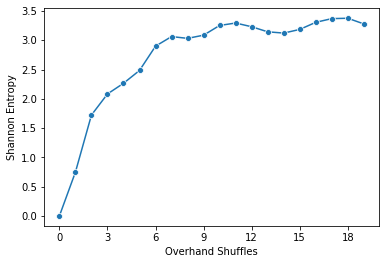

In [9]:
entropy_graph(overhand_data, 'Overhand Shuffles')

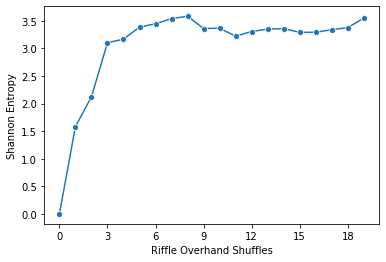

In [10]:
entropy_graph(riffle_over_data, 'Riffle Overhand Shuffles')

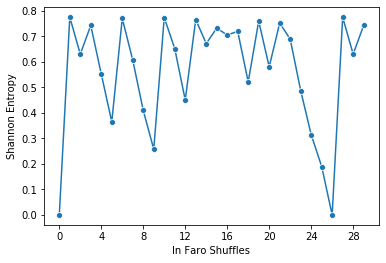

In [11]:
entropy_graph(in_faro_data, 'In Faro Shuffles')

In [12]:
def multi_shuffle_plot(data_series):
    npa_idx = pd.Series(np.array(list(range(1, 21)))) 
    df = npa_idx.to_frame().T
    df.rename(index = {0:'shuffle'}, inplace = True) 

    for name, s in data_series.items():
        df = pd.concat([df, s.to_frame().T])
        df.rename(index = {'entropy':name}, inplace = True) 
    
    df = df.T
    long_form = pd.melt(df, ['shuffle']) # .reset_index()
    fig, ax = plt.subplots()
    sns.lineplot(x='shuffle', y='value', hue='variable', marker='o', data=long_form)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(xlabel='Shuffles', ylabel='Shannon Entropy')

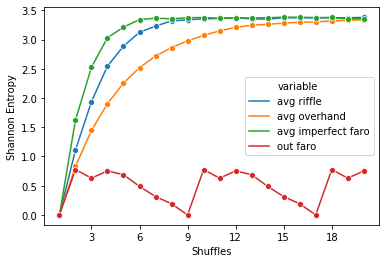

In [13]:
multi_shuffle_plot({
    'avg riffle': avg_riffle_data['entropy'], 
    'avg overhand': avg_overhand_data['entropy'],
    'avg imperfect faro': avg_ifaro_data['entropy'],
    'out faro': out_faro_data['entropy']
})

## References

* [Bayer, Diaconis, "Trailing the Dovetail Shuffle to its Lair", The Annals of Applied Probability, 1992, Vol. 2, No. 2, 294-313](https://statweb.stanford.edu/~cgates/PERSI/papers/bayer92.pdf)
* [Stats exchange answer](https://stats.stackexchange.com/questions/78591/correlation-between-two-decks-of-cards)
* [James, "How not to shuffle, The Knuth Fisher-Yates Algorithm", February, 2017](https://www.i-programmer.info/programming/theory/2744-how-not-to-shuffle-the-kunth-fisher-yates-algorithm.html)
* [Ruby's Random](https://ruby-doc.org/core-2.4.0/Random.html)
* [Gary Brown, "The Science of Cheating at Cards", Invention & Technology, 14.1, 1998](https://www.inventionandtech.com/content/science-cheating-cards-1?page=full)
* [Modern high-end card cheating](https://elie.net/blog/security/fuller-house-exposing-high-end-poker-cheating-devices/)
* [Levin, Peres, "Markov Chains and Mixing Times", second edition, 2017, chapter 8](https://pages.uoregon.edu/dlevin/MARKOV/mcmt2e.pdf)
* [Austin, "How Many Times Do I Have to Shuffle This Deck?", AMA, Dec. 2010](http://www.ams.org/publicoutreach/feature-column/fcarc-shuffle)
* [N.G. de Bruijn, "A Riffle Shuffle Card Trick and its Relation to Quasicrystal Theory", Nieuw Archief Wiskunde 4, 1987, 285-301.](http://alexandria.tue.nl/repository/freearticles/597580.pdf)